<a href="https://www.kaggle.com/code/mnik55/digit-recognizer-ml?scriptVersionId=202978293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [187]:
# https://medium.com/@tschechd/k-means-clustering-on-image-data-using-the-mnist-dataset-8101fcc650eb

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [188]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [189]:
train_csv = "/kaggle/input/digit-recognizer/train.csv"
test_csv = "/kaggle/input/digit-recognizer/test.csv"

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [190]:
train_df.sample(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24525,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
train_df.shape

(42000, 785)

In [193]:
test_df.shape

(28000, 784)

In [194]:
train_df.isna().sum().sum()

0

In [195]:
test_df.isna().sum().sum()

0

<Axes: xlabel='label', ylabel='count'>

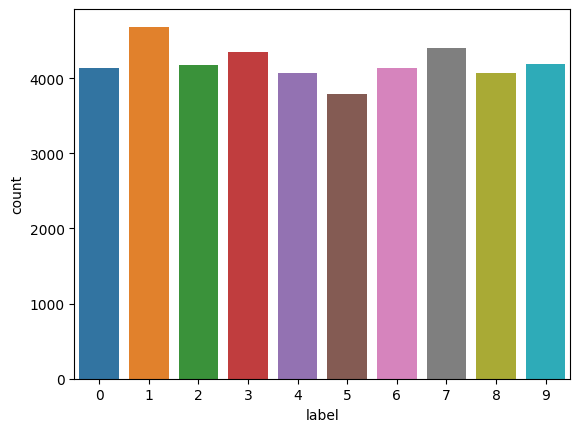

In [196]:
sns.countplot(x='label', data=train_df)

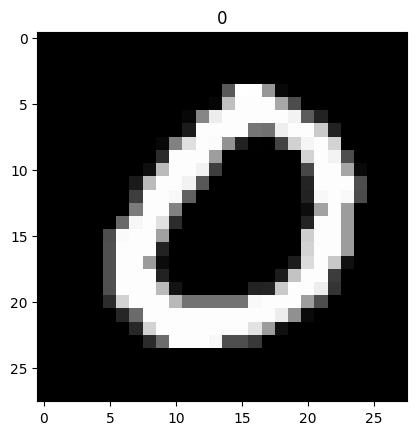

In [197]:
i = 54
img = train_df.iloc[i, 1:].values.reshape((28, 28))
plt.imshow(img, cmap="gray")
plt.title(train_df.loc[i, 'label'])
plt.show()

In [198]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=20)

# train_df_new = pd.DataFrame(pca.fit_transform(train_df.iloc[:, 1:]))
# train_df_new['label'] = train_df['label']

In [199]:
# test_df_new = pd.DataFrame(pca.transform(test_df))

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [201]:
train_df_new = train_df
test_df_new = test_df

In [202]:
# temp_df = train_df_new.iloc[:, 1:].to_numpy()
# temp_df[temp_df>1]=1

In [203]:
# train_df_new = pd.DataFrame(temp_df)
# train_df_new['label'] = train_df['label']

In [204]:
y = train_df_new['label']
x = train_df_new.drop(['label'], axis=1)

In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [206]:
# from sklearn.linear_model import LogisticRegression
# lg = LogisticRegression()
# lg.fit(x_train, y_train)
# y_pred = lg.predict(x_test)

# accuracy_score(y_test, y_pred)

In [207]:
from sklearn.svm import SVC

# svc = SVC()
# svc.fit(x_train, y_train)
# y_pred = svc.predict(x_test)

# accuracy_score(y_test, y_pred)

In [208]:
import xgboost as xgb
# boost = xgb.XGBClassifier()
# boost.fit(x_train, y_train)
# y_pred = boost.predict(x_test)

# accuracy_score(y_test, y_pred)

In [209]:
from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier()
# rfc.fit(x_train, y_train)
# y_pred = rfc.predict(x_test)

# accuracy_score(y_test, y_pred)

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

# grb = GradientBoostingClassifier()
# grb.fit(x_train, y_train)
# y_pred = grb.predict(x_test)

# accuracy_score(y_test, y_pred)

In [211]:
from sklearn.cluster import KMeans

# km = KMeans()
# km.fit(x_train, y_train)
# y_pred = km.predict(x_test)

# accuracy_score(y_test, y_pred)

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("pca", PCA()),
    ("model", KMeans(n_clus))
])

params = {
 'pca__n_components': [64],
}

grid = GridSearchCV(pipe, params, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_score_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.10038690476190476

In [ ]:
grid.best_params_

In [ ]:
x_train.shape

In [ ]:
# pca = grid.best_estimator_.named_steps['pca']
# c1 = pca.components_[0]
# c2 = pca.components_[1]

# lca = grid.best_estimator_.named_steps['pca']
# c1 = lca.scalings_[0]
# c2 = pca.scalings_[1]

In [ ]:
# temp_transform.shape

In [ ]:
y_train.shape

In [ ]:
y_train.unique()

In [ ]:
# temp_transform = pd.DataFrame(pca.transform(x_train))
# temp_transform.loc[:, 'label'] = y_train.values

In [ ]:
# temp_transform.head()

In [ ]:
y_train.shape

In [ ]:
# c1.shape

In [ ]:
# sns.scatterplot(x=0, y=1, data=temp_transform, hue='label')

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# pipe = Pipeline([
#     ("lda", LDA(n_components=9)),
#     ("model", SVC())
# ])

# params = {}

# grid = GridSearchCV(pipe, params, cv=3, scoring="accuracy", n_jobs=-1)
# grid.fit(x_train, y_train)
# grid.best_score_

In [ ]:
best_model = grid.best_estimator_

In [ ]:
(test_df_new.index+1).values

In [ ]:
id = (test_df_new.index+1).values

df_sub = pd.DataFrame({
    'ImageId': id,
    'Label': best_model.predict(test_df_new)
})

df_sub.head()

In [ ]:
df_sub.to_csv('submission.csv', index=False)